# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [2]:
# Crear columna 'title_length' con la longitud de cada título
df['title_length'] = df['title'].str.len()


In [3]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = mode(df['title_length'], keepdims=True)
valor_moda = moda.mode[0]

print("-MEDIDAS DE TENDENCIA CENTRAL ")
print(f"Media: {media} caracteres")
print(f"Mediana: {mediana} caracteres")
print(f"Moda: {valor_moda} caracteres")

-MEDIDAS DE TENDENCIA CENTRAL 
Media: 15.481103166496425 caracteres
Mediana: 14.0 caracteres
Moda: 12 caracteres


In [4]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df['title_length'].max() - df['title_length'].min()
varianza = df['title_length'].var()
desviacion = df['title_length'].std()

print("MEDIDAS DE DISPERSIÓN")
print(f"Rango: {rango} caracteres")
print(f"Varianza: {varianza:f}")
print(f"Desviación estándar: {desviacion:f} caracteres")

MEDIDAS DE DISPERSIÓN
Rango: 67 caracteres
Varianza: 72.106749
Desviación estándar: 8.491569 caracteres


In [5]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = skew(df['title_length'])
curtosis_valor = kurtosis(df['title_length'])

print("MEDIDAS DE FORMA ")
print(f"Asimetría (skewness): {asimetria:f}")
if asimetria > 0:
    print(" Distribución asimétrica positiva (cola a la derecha)")
elif asimetria < 0:
    print(" Distribución asimétrica negativa (cola a la izquierda)")
else:
    print(" Distribución simétrica")

print(f"Curtosis: {curtosis_valor:f}")
if curtosis_valor > 0:
    print(" Distribución leptocúrtica (más puntiaguda que la normal)")
elif curtosis_valor < 0:
    print(" Distribución platicúrtica (más aplanada que la normal)")
else:
    print(" Distribución mesocúrtica (similar a la normal)")

MEDIDAS DE FORMA 
Asimetría (skewness): 1.522914
 Distribución asimétrica positiva (cola a la derecha)
Curtosis: 3.786724
 Distribución leptocúrtica (más puntiaguda que la normal)


In [6]:
# Imprime el título más corto y el título más largo según su longitud
titulo_mas_corto = df.loc[df['title_length'].idxmin(), 'title']
longitud_mas_corta = df['title_length'].min()

titulo_mas_largo = df.loc[df['title_length'].idxmax(), 'title']
longitud_mas_larga = df['title_length'].max()

print(f"Título más corto: '{titulo_mas_corto}' ({longitud_mas_corta} caracteres)")
print(f"Título más largo: '{titulo_mas_largo}' ({longitud_mas_larga} caracteres)")

Título más corto: 'M' (1 caracteres)
Título más largo: 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb' (68 caracteres)


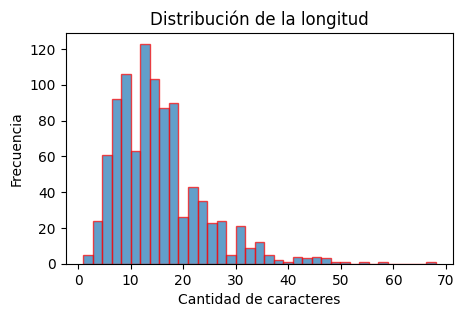

In [21]:
# grafica tus resultados
plt.figure(figsize=(5, 3))
plt.hist(df["title_length"],bins='auto', edgecolor='red', alpha=0.7)
plt.title("Distribución de la longitud")
plt.xlabel("Cantidad de caracteres")
plt.ylabel("Frecuencia")
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [25]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
valores = df['title_length'].head(5).tolist()
print(f"Valores: {valores}")


Valores: [24, 13, 22, 15, 12]


In [27]:
# Calcula la media de los 5 valores
media = sum(valores) / len(valores)
print (f'Media: {media}')

Media: 17.2


In [29]:
# Calcula las diferencias al cuadrado con respecto a la media
diferencias_cuadrado = [(valor - media)**2 
                        for valor in valores]
print(f"\nDiferencias al cuadrado: {diferencias_cuadrado}")


Diferencias al cuadrado: [46.24000000000001, 17.639999999999993, 23.040000000000006, 4.839999999999997, 27.039999999999992]


In [31]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

# Calcula la varianza (promedio de las diferencias al cuadrado)
varianza = sum(diferencias_cuadrado) / len(diferencias_cuadrado)
print(f"Varianza: {varianza}")

# Calcula la raíz cuadrada de la varianza para obtener la desviación estándar
desviacion = varianza ** 0.5
print(f"Desviación estándar: {desviacion}")

Varianza: 23.76
Desviación estándar: 4.874423042781577
